In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

In [3]:
for col in df.columns:
    if 'Draw' in col:
        df.drop(columns=col, axis=1, inplace=True)

In [4]:
df['Ambient Humidity'] = pd.to_numeric(df['Ambient Humidity'], errors='coerce')
for col in ['Higher Heating Value', 'Qhw(i)', 'Qhw67(i)', 'Qr']:
    df[col] = df[col].str.replace(',','')
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [5]:
sns.set(rc={'figure.figsize':(13,9)})

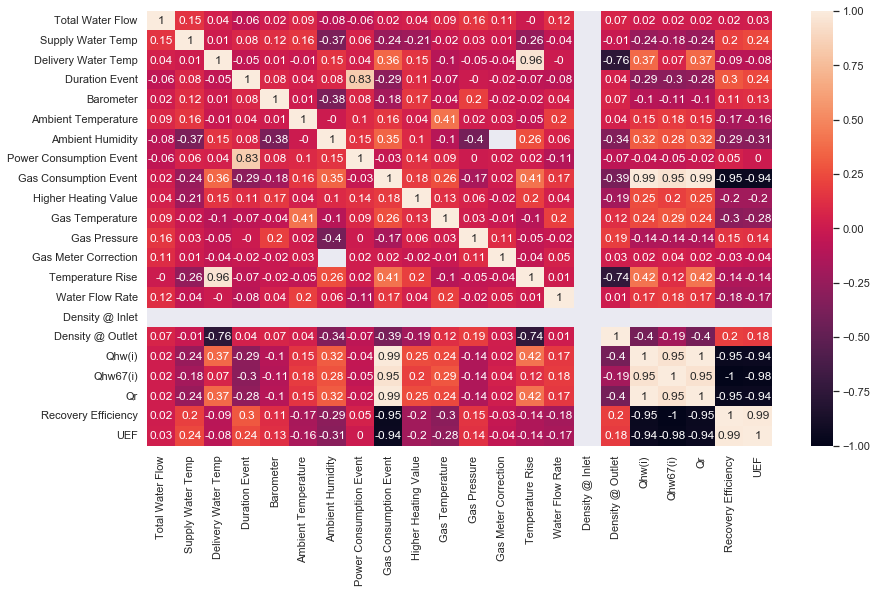

In [6]:
fig, ax = plt.subplots(figsize=(14,8))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [7]:
#Correlation with output variable
cor_target = abs(correlation_matrix['UEF'])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

Ambient Humidity         0.31
Gas Consumption Event    0.94
Qhw(i)                   0.94
Qhw67(i)                 0.98
Qr                       0.94
Recovery Efficiency      0.99
UEF                      1.00
Name: UEF, dtype: float64

Text(0, 0.5, 'UEF')

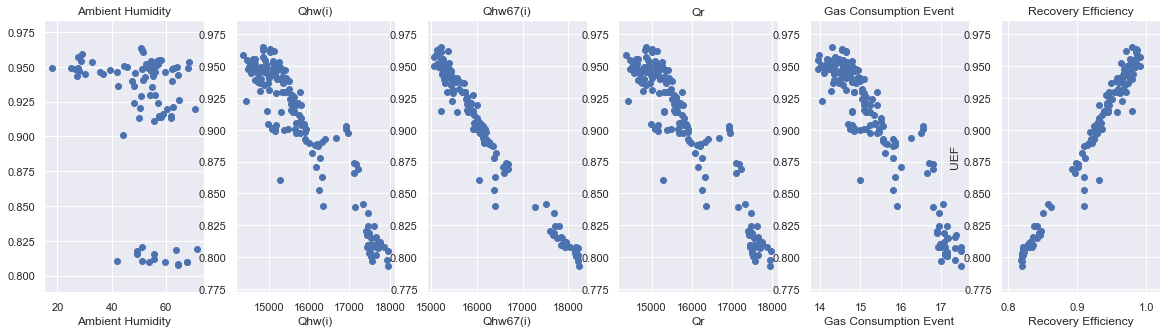

In [8]:
plt.figure(figsize=(20, 5))

features = ['Ambient Humidity', 'Qhw(i)', 'Qhw67(i)', 'Qr','Gas Consumption Event', 'Recovery Efficiency']
target = df['UEF']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
plt.ylabel('UEF')

In [9]:
#Correction_fact = (GasPressure*0.0735+Barometer)*520/(30*(460+GasTemp))
#Qhw67i = Mi*Cpi*67/Recovery Efficiency
#Qhwi = Mi*Cpi*Tdeltai/Recovery Efficiency
#Qr = GasConsumption1*HHV*Correction_fact1*GasMeterCorrection + PowerConsumption1*3.412
#Recovery_eff = M1*Cp1*Tdelta1/Qr

In [10]:
features = ['Gas Consumption Event', 'Recovery Efficiency']

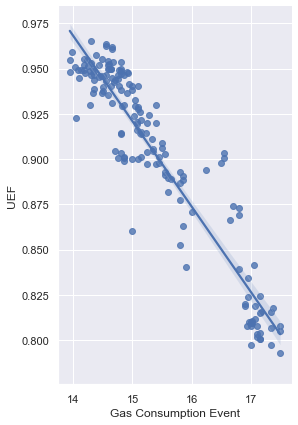

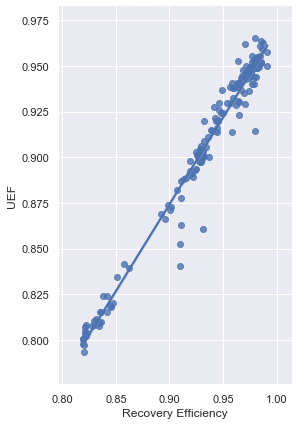

In [11]:
sns.pairplot(df, x_vars=['Gas Consumption Event'], y_vars='UEF', height=6, aspect=0.7, kind='reg')
sns.pairplot(df, x_vars=['Recovery Efficiency'], y_vars='UEF', height=6, aspect=0.7, kind='reg')

In [12]:
X = df[features]
y = df['UEF']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

In [15]:
print(linreg.intercept_)
print(linreg.coef_)

0.041648679407829126
[-7.14300259e-04  9.37468953e-01]


In [16]:
list(zip(X, linreg.coef_))

[('Gas Consumption Event', -0.0007143002588048411),
 ('Recovery Efficiency', 0.9374689533170691)]

In [17]:
y_pred = linreg.predict(X_test)

MAE: 0.006359529697880381
MSE: 8.739777290505211e-05
RMSE: 0.009348677601942005
R²: 0.9699114916426071


Text(0.5, 1.0, 'UEF vs Predicted uef: $Y_i$ vs $\\hat{Y}_i$')

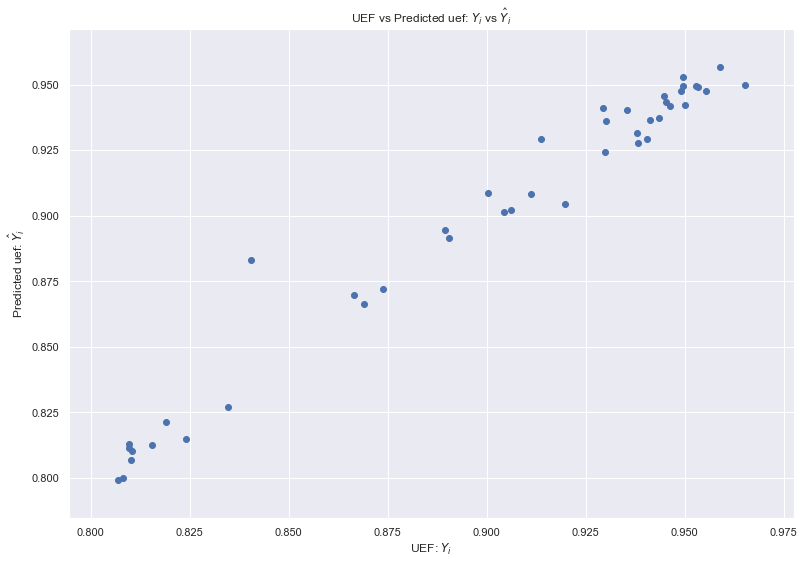

In [18]:
from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R²:', metrics.r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.xlabel("UEF: $Y_i$")
plt.ylabel("Predicted uef: $\hat{Y}_i$")
plt.title("UEF vs Predicted uef: $Y_i$ vs $\hat{Y}_i$")